# COVID-19 Visualization

This project was just to practice some skills using the CDC provied dataset
https://github.com/CDCgov

In [1]:
# packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("readr")
library(ggplot2)
library(dplyr)
library(readr)

Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\RtmpqosYPt\downloaded_packages


Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\RtmpqosYPt\downloaded_packages


Installing package into 'C:/Users/vbthe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vbthe\AppData\Local\Temp\RtmpqosYPt\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 4.0.2"
Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'readr' was built under R version 4.0.2"


In [2]:
# dataset
data <- read.csv("coronavirus.csv", header = TRUE)
#data

In [3]:
date_cases <- data %>% group_by(date, country) %>% summarise(total = sum(cases))
date_cases

`summarise()` regrouping output by 'date' (override with `.groups` argument)



date,country,total
<chr>,<chr>,<int>
2020-01-22,Afghanistan,0
2020-01-22,Albania,0
2020-01-22,Algeria,0
2020-01-22,Andorra,0
2020-01-22,Angola,0
2020-01-22,Antigua and Barbuda,0
2020-01-22,Argentina,0
2020-01-22,Armenia,0
2020-01-22,Australia,0


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



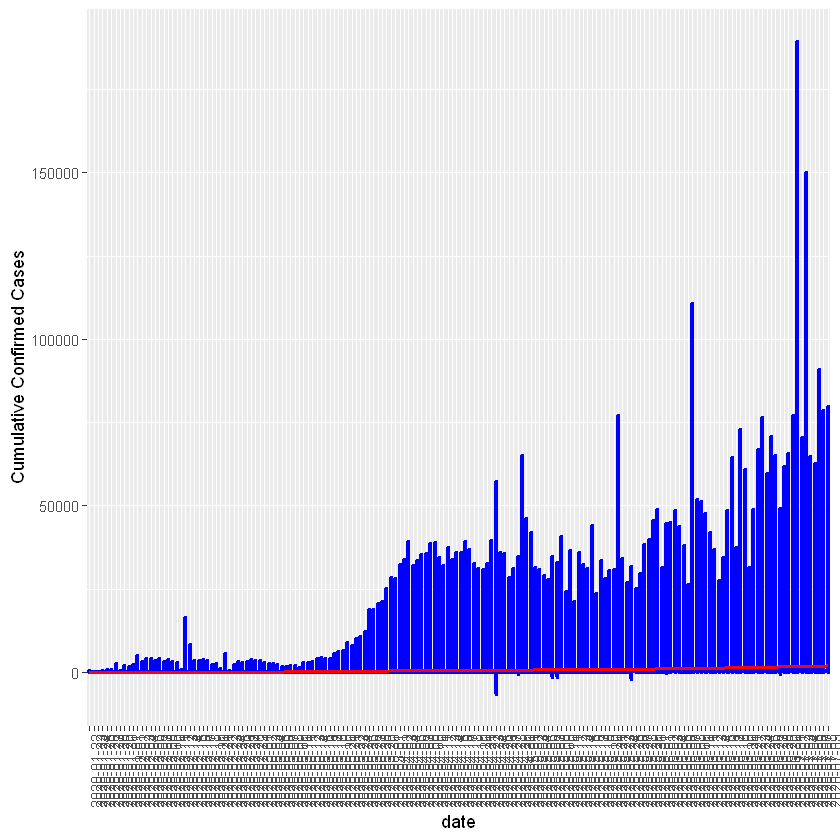

In [4]:
#trying line plot to show total cases as the dates progressed
plot1 <- ggplot(date_cases, aes(x = date, y = total, group = 1)) + geom_line(color = "blue", size = 1.2) +
ylab("Cumulative Confirmed Cases") + theme(axis.text.x = element_text(angle =90)) +
#+ xlim(0,30)
geom_smooth(method = "auto", se = FALSE, color = "red")
plot1

In [5]:
china_cases <- data %>% filter(country == "China") %>% 
group_by(country, date) %>% summarise(total_china = sum(cases)) 
#china_cases

`summarise()` regrouping output by 'country' (override with `.groups` argument)



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



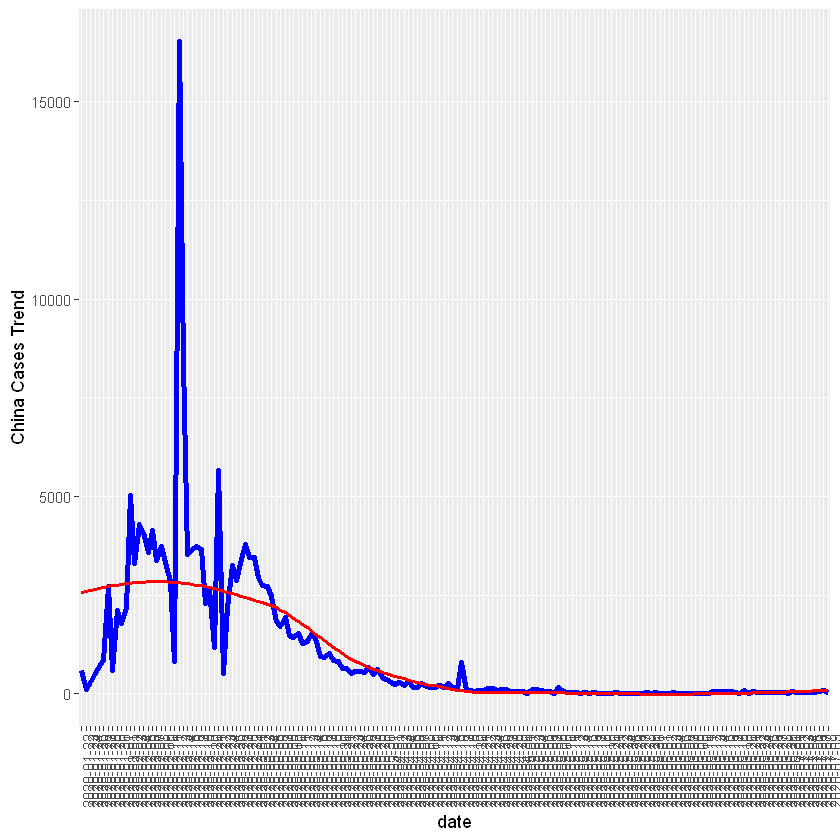

In [6]:
#lineplot for china cases
chinaline <- ggplot(china_cases, aes(x = date, y = total_china, group = 1)) + 
geom_line(color = "blue", size = 1.5) +
ylab("China Cases Trend") + theme(axis.text.x = element_text(angle = 90)) +
geom_smooth(method = "auto", se = FALSE, color = "red")
chinaline

In [7]:
us_cases <- data %>% filter(country == "US") %>% group_by(country, date) %>%
summarise(total_us = sum(cases))
#us_cases

`summarise()` regrouping output by 'country' (override with `.groups` argument)



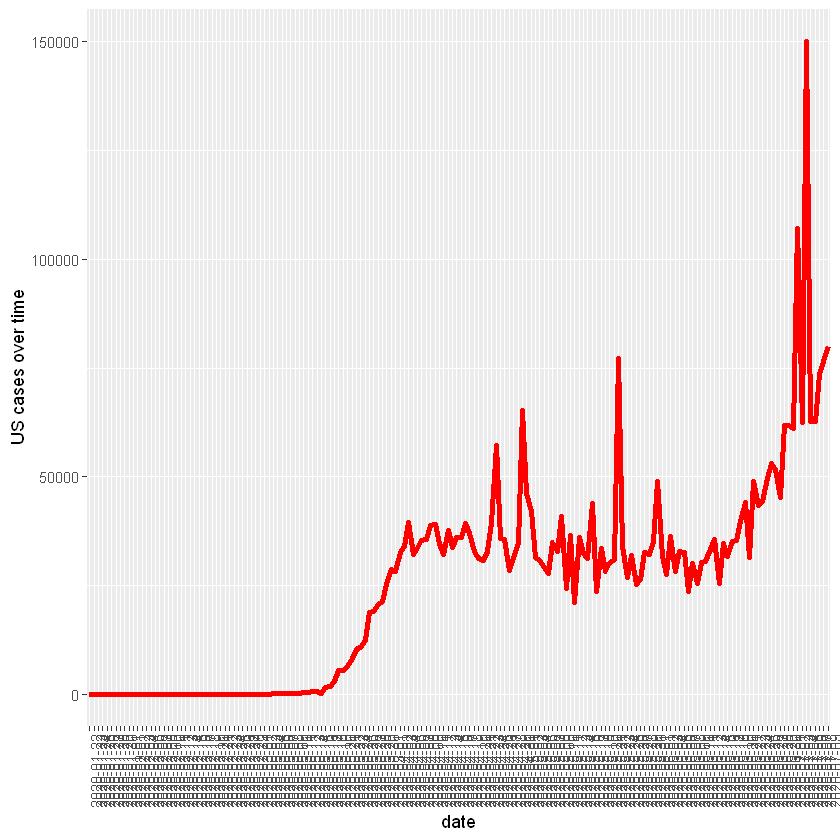

In [8]:
#us line plot
us_line <- ggplot(us_cases, aes(x = date, y = total_us, group = 1)) +
geom_line(color = "red", size = 1.5) + 
theme(axis.text.x = element_text(angle = 90)) +
ylab("US cases over time")
us_line

In [9]:
# ploting china cases vs us
#create data frame for both china and us

china_us_df <- left_join(us_cases, china_cases, by = c("date" = "date"))
#china_us_df

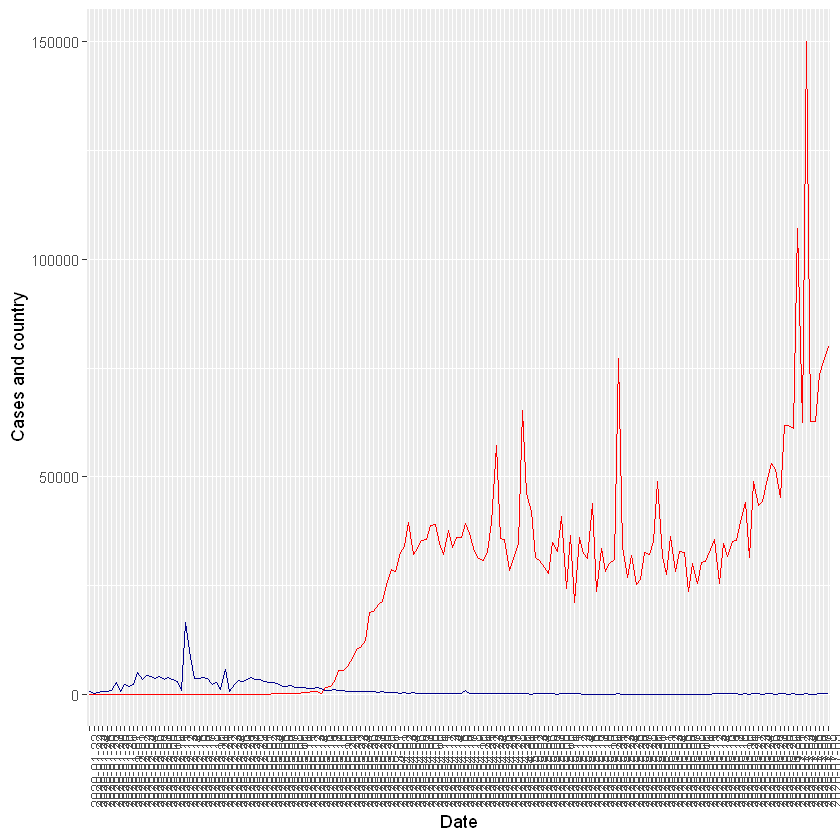

In [10]:
china_us_plot <- ggplot(china_us_df) +
geom_line(aes(x = date, y = total_us, group = 1), color = "red") +
geom_line(aes(x = date, y = total_china, group = 1), color = "darkblue") +
ylab("Cases and country") + xlab("Date") + 
theme(axis.text.x = element_text(angle = 90))
china_us_plot

$title
[1] "China vs US Cases"

attr(,"class")
[1] "labels"

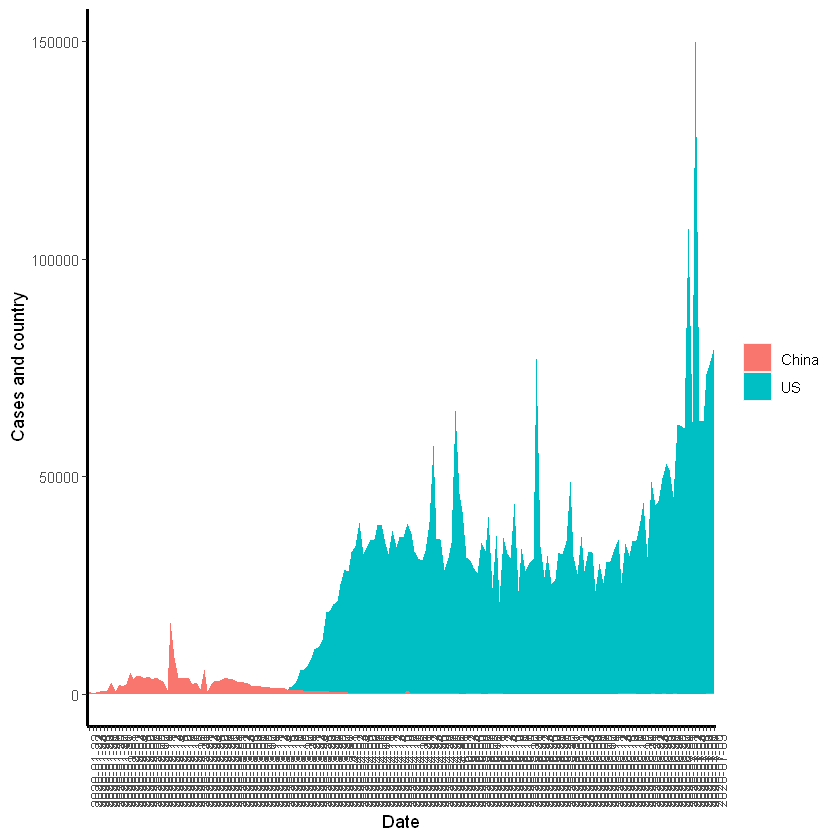

In [11]:
china_us_area <- ggplot(china_us_df) +
geom_area(aes(x = date, y = total_us, group = 1, fill = "US")) +
geom_area(aes(x = date, y = total_china, group = 1, fill = "China")) +
ylab("Cases and country") + xlab("Date") + 
theme(axis.text.x = element_text(angle = 90), 
     axis.line = element_line(size = 1, color = "black"),
     #panel.grid.major = element_line(color = "black"),
     #panel.grid.minor = element_line(color = "black"),
     #panel.background = element_blank()) +
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      legend.title = element_blank())
ggtitle("China vs US Cases")
china_us_area